
Logistic Regression Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Fore

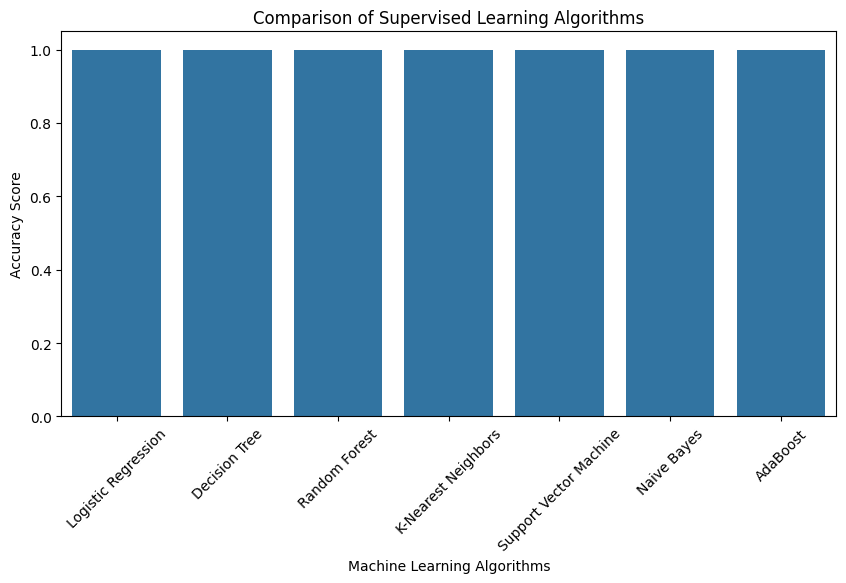

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset (using Iris dataset as an example)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split dataset
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define function to train and evaluate a model
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{model_name} Accuracy: {accuracy:.2f}')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return accuracy

# Train and evaluate each model separately
log_reg_acc = evaluate_model(LogisticRegression(max_iter=200), 'Logistic Regression')
dt_acc = evaluate_model(DecisionTreeClassifier(), 'Decision Tree')
rf_acc = evaluate_model(RandomForestClassifier(), 'Random Forest')
knn_acc = evaluate_model(KNeighborsClassifier(), 'K-Nearest Neighbors')
svm_acc = evaluate_model(SVC(), 'Support Vector Machine')
nb_acc = evaluate_model(GaussianNB(), 'Naive Bayes')
ada_acc = evaluate_model(AdaBoostClassifier(), 'AdaBoost')

# Store results in dictionary
results = {
    'Logistic Regression': log_reg_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'K-Nearest Neighbors': knn_acc,
    'Support Vector Machine': svm_acc,
    'Naive Bayes': nb_acc,
    'AdaBoost': ada_acc
}

# Plot accuracy scores
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Supervised Learning Algorithms")
plt.xticks(rotation=45)
plt.show()